In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
# Remove irrelevant columns

In [5]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [6]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [7]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [8]:
# Check for missing values
df['host_response_rate'].isna().sum()

1435

In [9]:
# Fill in missing values (separate value because there are so many)
df.host_response_rate.fillna("unknown", inplace=True)

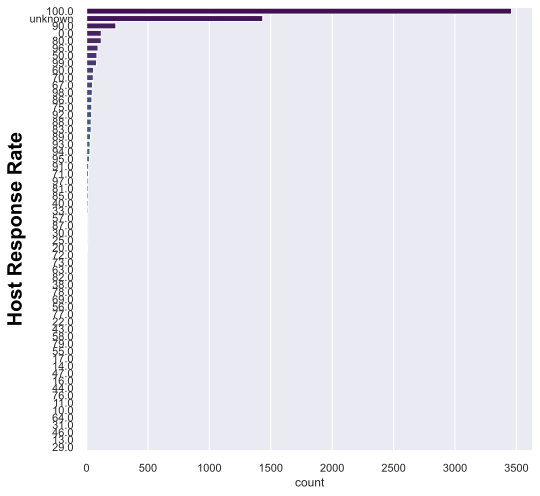

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'host_response_rate',data = df,order = df['host_response_rate'].value_counts().index,palette = "viridis")
plt.ylabel('Host Response Rate',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

In [11]:
# create a new column for binned host response rate
df['binned_host_response_rate'] = df['host_response_rate'].apply(lambda x: 'perfect' if x == 100 else 'not perfect')

# print the value counts of the new column
print(df['binned_host_response_rate'].value_counts())

perfect        3460
not perfect    2919
Name: binned_host_response_rate, dtype: int64


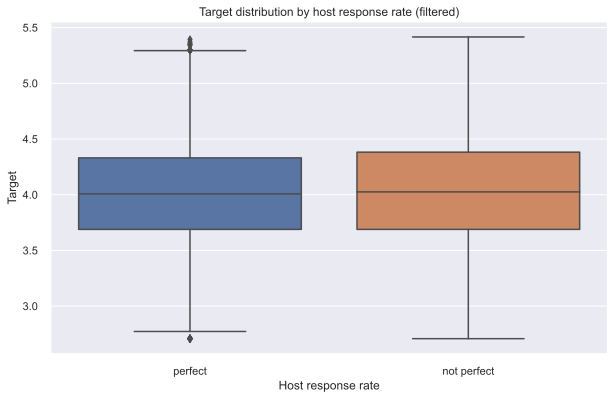

In [12]:
# Generate the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='binned_host_response_rate', y='target', data=df)
ax.set_title('Target distribution by host response rate (filtered)')
ax.set_xlabel('Host response rate')
ax.set_ylabel('Target')
plt.show()

In [13]:
# Generate the statistical description
df.groupby('binned_host_response_rate')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
binned_host_response_rate,,,,,,,,
not perfect,2919.0,4.031766,0.523268,2.70805,3.688879,4.025352,4.382027,5.416100
perfect,3460.0,4.011442,0.506302,2.70805,3.688879,4.007333,4.330733,5.393628


In [14]:
import scipy.stats as stats

# get the unique values of host_response_time
response_times = df['binned_host_response_rate'].dropna().unique()

# create a list of data frames containing the prices for each response time category
price_by_response_time = [df.loc[df['binned_host_response_rate'] == rt, 'target'] for rt in response_times]

# perform ANOVA test
f_value, p_value = stats.f_oneway(*price_by_response_time)

print("F-value: ", f_value)
print("P-value: ", p_value)

F-value:  2.4740813023851187
P-value:  0.11578665972753606


In [15]:
# Because of the reasons highlighted in this EDA, we have decided to remove host_response_time
# as an attribute from our training set.